In [180]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn
from time import sleep
from matplotlib.animation import FuncAnimation

In [183]:
import numpy as np
from time import time

def smoothing_factor(t_e, cutoff):
    r = 2 * np.pi * cutoff * t_e
    return r / (r + 1)


def exponential_smoothing(a, x, x_prev):
    return a * x + (1 - a) * x_prev


class OneEuroFilter:
    def __init__(self, x0, dx0=0.0, min_cutoff=1.0, beta=0.0,
                 d_cutoff=1.0):
        """Initialize the one euro filter."""
        # The parameters.
        self.data_shape = x0.shape
        self.min_cutoff = np.full(x0.shape, min_cutoff)
        self.beta = np.full(x0.shape, beta)
        self.d_cutoff = np.full(x0.shape, d_cutoff)
        # Previous values.
        self.x_prev = x0.astype(np.float64)
        self.dx_prev = np.full(x0.shape, dx0)
        self.t_prev = time()

    def __call__(self, x):
        """Compute the filtered signal."""
        assert x.shape == self.data_shape

        t = time()
        t_e = t - self.t_prev
        t_e = np.full(x.shape, t_e)

        # The filtered derivative of the signal.
        a_d = smoothing_factor(t_e, self.d_cutoff)
        dx = (x - self.x_prev) / t_e
        dx_hat = exponential_smoothing(a_d, dx, self.dx_prev)

        # The filtered signal.
        cutoff = self.min_cutoff + self.beta * np.abs(dx_hat)
        a = smoothing_factor(t_e, cutoff)
        x_hat = exponential_smoothing(a, x, self.x_prev)

        # Memorize the previous values.
        self.x_prev = x_hat
        self.dx_prev = dx_hat
        self.t_prev = t

        return x_hat

0.08161482765694462
0.11196311551875715
0.1827797281149265
0.34927489778682197
0.40569733443852685
0.6022937132660389
0.6664234828925959
0.7612806730791382
0.8210226295999963
0.9138030102467811
0.9039034157783972
0.9271811867611475
0.9400032411722368
0.9659571187572065
0.959649225397935
0.9546683007409333
0.9129232906244772
0.8638714829478504
0.8027233224271415
0.6676759095959811
0.6005039340970333
0.5036392875998033
0.377828026573551
0.2597256037731101
0.08501361899899565
-0.04913799023247032
-0.20106345672630857
-0.3118257963951515
-0.39803320291389543
-0.5260535952461436
-0.6288832376132644
-0.7261492580769799
-0.81144459622517
-0.8757329494228734
-0.9098583175673334
-0.9619634901952758
-0.969651385748607
-0.9615171160098702
-0.9602224443267642
-0.9601779357169337
-0.9581500242539394
-0.9386392787060723
-0.8267611379346639
-0.7488252315684085
-0.6737706987206677
-0.5542697599086437
-0.3707972220654643
-0.2762458079311129
-0.15256995021400166
-0.035523258424283284
0.06817982660957728

MovieWriter imagemagick unavailable; using Pillow instead.


-0.10947526346848027
0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0


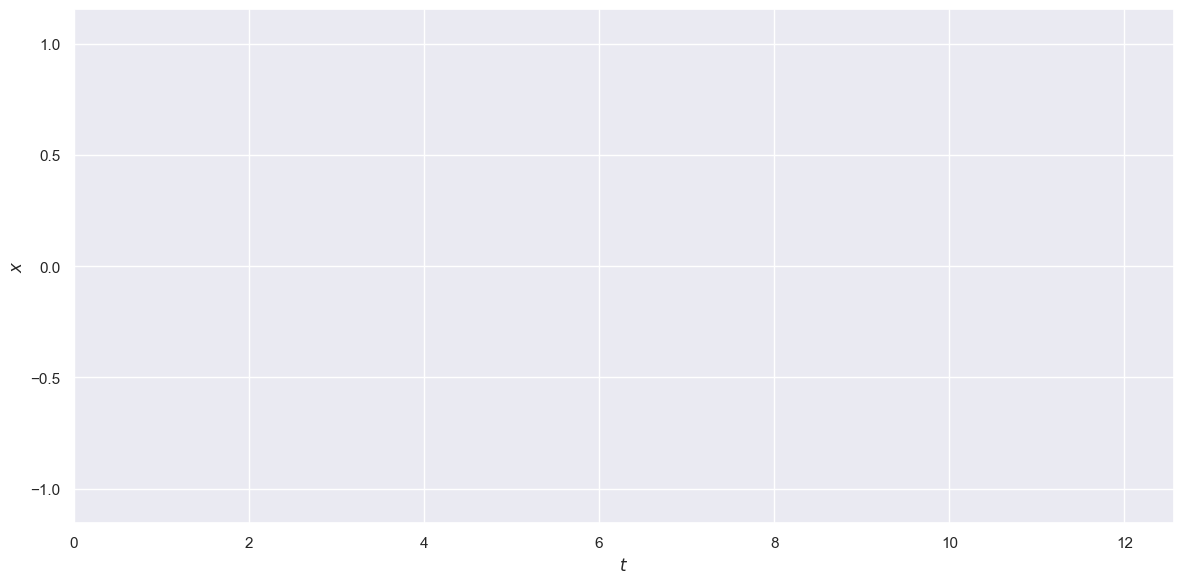

In [184]:
np.random.seed(1)

# Parameters
frames = 100
start = 0
end = 4 * np.pi
scale = 0.05


# The noisy signal
t = np.linspace(start, end, frames)
x = np.sin(t)
x_noisy = x + np.random.normal(scale=scale, size=len(t))


# The filtered signal
min_cutoff = 0.004
beta = 0.7
x_hat = np.zeros_like(x_noisy)
x_hat[0] = x_noisy[0]
one_euro_filter = OneEuroFilter(
    x_noisy[0],
    min_cutoff=min_cutoff,
    beta=beta
)
for i in range(1, len(t)):
    sleep(0.1)
    x_hat[i] = one_euro_filter(x_noisy[i])
    print(x_hat[i])


# The figure
# https://eli.thegreenplace.net/2016/drawing-animated-gifs-with-matplotlib/
seaborn.set()
fig, ax = plt.subplots(figsize=(12, 6))
ax.set(
    xlim=(start, end),
    ylim=(1.1*(-1-scale), 1.1*(1+scale)),
    xlabel="$t$",
    ylabel="$x$",
)
fig.set_tight_layout(True)
signal, = ax.plot(t[0], x_noisy[0], 'o')
filtered, = ax.plot(t[0], x_hat[0], '-')


def update(i):
    print(i)
    signal.set_data(t[0:i], x_noisy[0:i])
    filtered.set_data(t[0:i], x_hat[0:i])
    return signal, filtered


if __name__ == '__main__':
    # FuncAnimation will call the 'update' function for each frame; here
    # animating over 10 frames, with an interval of 200ms between frames.
    anim = FuncAnimation(fig, update, frames=frames, interval=100)
    anim.save('one_euro_filter.gif', dpi=80, writer='imagemagick')
    # update(frames)
    plt.savefig("one_euro_filter.png", dpi=300)

0.08162708493924721
0.11193701017005131
0.1827413670829211
0.3471815061782033
0.40488316896190174
0.6027034521128973
0.6675598291334848
0.7604065491049012
0.8197893720478323
0.9151989093999762
0.9047302099410955
0.927513746895745
0.9401542806379009
0.9659464906264996
0.9595896841617151
0.9545051364588188
0.9133657180492945
0.863009250882619
0.8015365780617703
0.668340387520237
0.6015523692617908
0.5026972040954671
0.3763488883401026
0.25841091847805586
0.08357699857174503
-0.04831674752184421
-0.19950408071917133
-0.31085339199726936
-0.3963843290636716
-0.5273393658622327
-0.628319651077828
-0.7259037048894725
-0.8114171955618117
-0.8759674701943139
-0.9105742820281939
-0.9623648734577768
-0.9700242904084416
-0.9622380941368489
-0.9610834515517854
-0.9609471986041788
-0.9587733401813658
-0.938984974087229
-0.8254836668993767
-0.7483014559835739
-0.6740944904154493
-0.5542498210163208
-0.36874846959488716
-0.27612607339661294
-0.1523736799631753
-0.035547919770716245
0.0664414241448203

MovieWriter imagemagick unavailable; using Pillow instead.


-0.10909512952694787
0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0


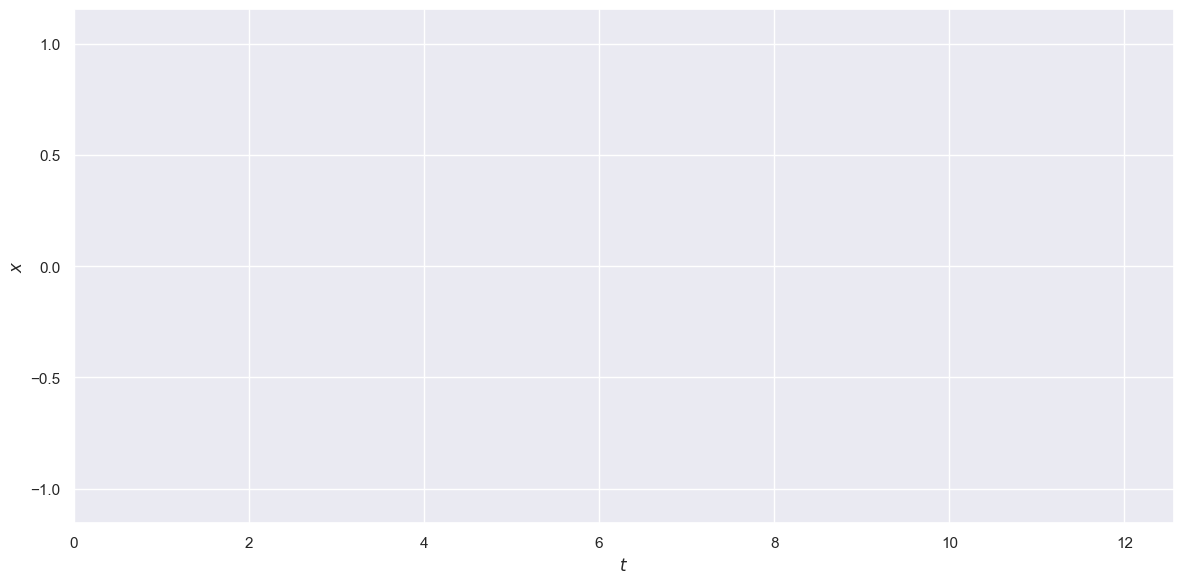

In [189]:
np.random.seed(1)

# Parameters
frames = 100
start = 0
end = 4 * np.pi
scale = 0.05


# The noisy signal
t = np.linspace(start, end, frames)
x = np.sin(t)
x_noisy = x + np.random.normal(scale=scale, size=len(t))
y = np.cos(t)
y_noisy = y + np.random.normal(scale=scale, size=len(t))
df = np.column_stack((x_noisy, y_noisy))

# The filtered signal
min_cutoff = 0.004
beta = 0.7
df_hat = np.zeros_like(df)
df_hat[0] = df[0]
one_euro_filter = OneEuroFilter(
    df[0],
    min_cutoff=min_cutoff,
    beta=beta
)
for i in range(1, len(t)):
    sleep(0.1)
    df_hat[i] = one_euro_filter(df[i])
    print(x_hat[i])

x_hat = df_hat[:, 1]
# The figure
# https://eli.thegreenplace.net/2016/drawing-animated-gifs-with-matplotlib/
seaborn.set()
fig, ax = plt.subplots(figsize=(12, 6))
ax.set(
    xlim=(start, end),
    ylim=(1.1*(-1-scale), 1.1*(1+scale)),
    xlabel="$t$",
    ylabel="$x$",
)
fig.set_tight_layout(True)
signal, = ax.plot(t[0], x_noisy[0], 'o')
filtered, = ax.plot(t[0], x_hat[0], '-')


def update(i):
    print(i)
    signal.set_data(t[0:i], x_noisy[0:i])
    filtered.set_data(t[0:i], x_hat[0:i])
    return signal, filtered


if __name__ == '__main__':
    # FuncAnimation will call the 'update' function for each frame; here
    # animating over 10 frames, with an interval of 200ms between frames.
    anim = FuncAnimation(fig, update, frames=frames, interval=100)
    anim.save('one_euro_filter.gif', dpi=80, writer='imagemagick')
    # update(frames)
    plt.savefig("one_euro_filter.png", dpi=300)

In [187]:
x_hat = df_hat[:, 0]

array([ 0.08121727,  0.08161928,  0.11160932,  0.18272839,  0.34853478,
        0.40548688,  0.60098803,  0.6661675 ,  0.76156575,  0.82079682,
        0.91565769,  0.9052929 ,  0.92783445,  0.94026582,  0.96603336,
        0.95967644,  0.95457053,  0.91362971,  0.86337404,  0.80204437,
        0.66790873,  0.60073848,  0.50398968,  0.37673637,  0.25937748,
        0.08297368, -0.04895494, -0.20025703, -0.3117854 , -0.39774582,
       -0.52694427, -0.62820112, -0.72646146, -0.81179982, -0.87544661,
       -0.90939172, -0.96193744, -0.96974582, -0.96193495, -0.96077829,
       -0.96066785, -0.95852199, -0.93875186, -0.82676288, -0.7487064 ,
       -0.67435884, -0.55589283, -0.36837602, -0.27465697, -0.15110308,
       -0.03619845,  0.06618472,  0.15774002,  0.28443726,  0.41027076,
        0.54499899,  0.6650055 ,  0.7626251 ,  0.82305012,  0.88997963,
        0.90563278,  0.96141213,  0.98207076,  0.98055656,  0.98171825,
        0.98153028,  0.97599094,  0.95543833,  0.91832852,  0.74